In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
analysis = None
for filename in os.listdir("./analysis"):
    if "analysis" in filename:
        with open("./analysis/" + filename, "rb") as file:
            if analysis == None:
                analysis = pickle.load(file)
            else:
                new_analysis = pickle.load(file)
                for k in analysis.keys():
                    analysis[k].extend(new_analysis[k])

In [3]:
weight_names = [
	"bias",
   	"valid_move",
	"guaranteed_bomb_drop",
	"number_of_destroyable_crates",

	"distance_to_nearest_enemy",
	# "inverse_distance_to_nearest_enemy",
	# "inverse_distance_to_nearest_enemy_squared",
	"action_delta_distance_to_closest_enemy",

	"distance_to_nearest_coin",
	# "inverse_distance_to_nearest_coin_squared",
	# "action_delta_distance_to_closest_coin",
	"nearest_to_nearest_coin",

	"distance_to_nearest_crate",
	# "inverse_distance_to_nearest_crate",
	# "inverse_distance_to_nearest_crate_squared",
	"action_delta_distance_to_closest_crate",

	"distance_to_nearest_explosion",
	# "inverse_distance_to_nearest_explosion",
	# "inverse_distance_to_nearest_explosion_squared",
	"action_delta_distance_to_closest_explosion",

	"distance_to_nearest_bomb",
	# "inverse_distance_to_nearest_bomb_squared",
	"action_delta_distance_to_closest_bomb",
	# "same_x_bomb",
	# "same_y_bomb",
	"action_covers_from_bomb",

	"inv_visited_cell_n_steps_ago",
	"had_bomb_for"
]

In [4]:
named_weights = {weight_names[i]: analysis["weight_history"][-1][i] for i in range(len(weight_names))}
sorted(named_weights.items(), key = lambda kv: -kv[1])

[('number_of_destroyable_crates', 2.3357570267587553),
 ('action_delta_distance_to_closest_bomb', 0.7347069052294605),
 ('nearest_to_nearest_coin', 0.38681218385663185),
 ('guaranteed_bomb_drop', 0.34735143169087734),
 ('had_bomb_for', 0.2996143492674035),
 ('action_covers_from_bomb', 0.14608705562960914),
 ('valid_move', 0.14044763825097392),
 ('distance_to_nearest_enemy', 0.08467145948393337),
 ('distance_to_nearest_bomb', 0.0042914127589886684),
 ('distance_to_nearest_explosion', 0.0),
 ('distance_to_nearest_coin', -0.07894259702953438),
 ('action_delta_distance_to_closest_explosion', -0.25238795274622816),
 ('action_delta_distance_to_closest_enemy', -0.424064742225872),
 ('inv_visited_cell_n_steps_ago', -1.7592131119261771),
 ('action_delta_distance_to_closest_crate', -7.318458160685266),
 ('distance_to_nearest_crate', -7.492169233590671),
 ('bias', -9.148072700856552)]

In [5]:
for r in analysis["reward_history"][-2:]: print(r[::-1])

[-10.5, -10.5, -10.5, -4.5, -1, -1, -1, 1, -10, -8, -7, -1, -6.125, -1, -6, -1, 0, 1, 0, -1, 0.5, -1.5, -1, 0, -7.5, -1.5, -1, 1, -5.125, -0.5, 1, -4, -4, 1, -4, -4, -4.5, -3, -3, -3, -3.5, -3.5]
[-8.5, -8.5, -8.5, -7.5, -1, 0, -1, 1, -34, -34, -33, -32, -30, -29, -29, -28, -26, -25, -25, -24, -23, -22, -20, -20, -19, -18, -17, -1, -15, -1, -15, -1, -1, -13, 1, -1, 0, -12, -13, -1, -1.5, -12, -12, -1, 0.5, -11, -10, 1, -9.5, -10, -10, -9, -9, -8, -9, -7, -7, -7, -8, -6, -7.5, -6, -6, -6, -6.5, -6, -6.5, -5, -5.5, -5, -5.5, -4, -4.5, -4, -3.5, -2, -3.5, -2, -2]


In [6]:
reward_sum_history = [np.sum(step_rewards) for step_rewards in analysis["reward_history"]]
filtered_reward_sum_history = [np.sum([reward for reward in step_rewards if reward in [1, 5]]) for step_rewards in analysis["reward_history"]]

In [7]:
def array_splits_of_size(N, array):
    return np.array_split(array, len(array) // N)

In [8]:
each_weights_history = np.array(analysis["weight_history"]).T
each_q_history = np.array(analysis["q_history"]).T

In [9]:
analysis["q_history"][-1]

array([-63.2676906 , -62.93230215, -62.04784157, -62.04784157,
       -61.91952625, -60.36235489])

In [10]:
N = 50

each_weights_history_mean = np.array([[np.mean(chunk) for chunk in np.array_split(this_weights_history, N)] for this_weights_history in each_weights_history])
reward_sum_history_mean = np.array([np.mean(chunk) for chunk in np.array_split(reward_sum_history, N)])
filtered_reward_sum_history_mean = np.array([np.mean(chunk) for chunk in np.array_split(filtered_reward_sum_history, N)])
loss_history_mean = np.array([np.mean(chunk) for chunk in np.array_split(analysis["loss_history"], N)])
game_length_mean = np.array([np.mean(chunk) for chunk in np.array_split(analysis["game_length"], N)])
temp_mean = np.array([np.mean(chunk) for chunk in np.array_split(analysis["temp"], N)])

each_weights_history_max = np.array([[np.max(chunk) for chunk in np.array_split(this_weights_history, N)] for this_weights_history in each_weights_history])
reward_sum_history_max = np.array([np.max(chunk) for chunk in np.array_split(reward_sum_history, N)])
filtered_reward_sum_history_max = np.array([np.max(chunk) for chunk in np.array_split(filtered_reward_sum_history, N)])
loss_history_max = np.array([np.max(chunk) for chunk in np.array_split(analysis["loss_history"], N)])
game_length_max = np.array([np.max(chunk) for chunk in np.array_split(analysis["game_length"], N)])
temp_max = np.array([np.max(chunk) for chunk in np.array_split(analysis["temp"], N)])

each_weights_history_min = np.array([[np.min(chunk) for chunk in np.array_split(this_weights_history, N)] for this_weights_history in each_weights_history])
reward_sum_history_min = np.array([np.min(chunk) for chunk in np.array_split(reward_sum_history, N)])
filtered_reward_sum_history_min = np.array([np.min(chunk) for chunk in np.array_split(filtered_reward_sum_history, N)])
loss_history_min = np.array([np.min(chunk) for chunk in np.array_split(analysis["loss_history"], N)])
game_length_min = np.array([np.min(chunk) for chunk in np.array_split(analysis["game_length"], N)])
temp_min = np.array([np.min(chunk) for chunk in np.array_split(analysis["temp"], N)])

In [11]:
len(analysis["game_length"])

51

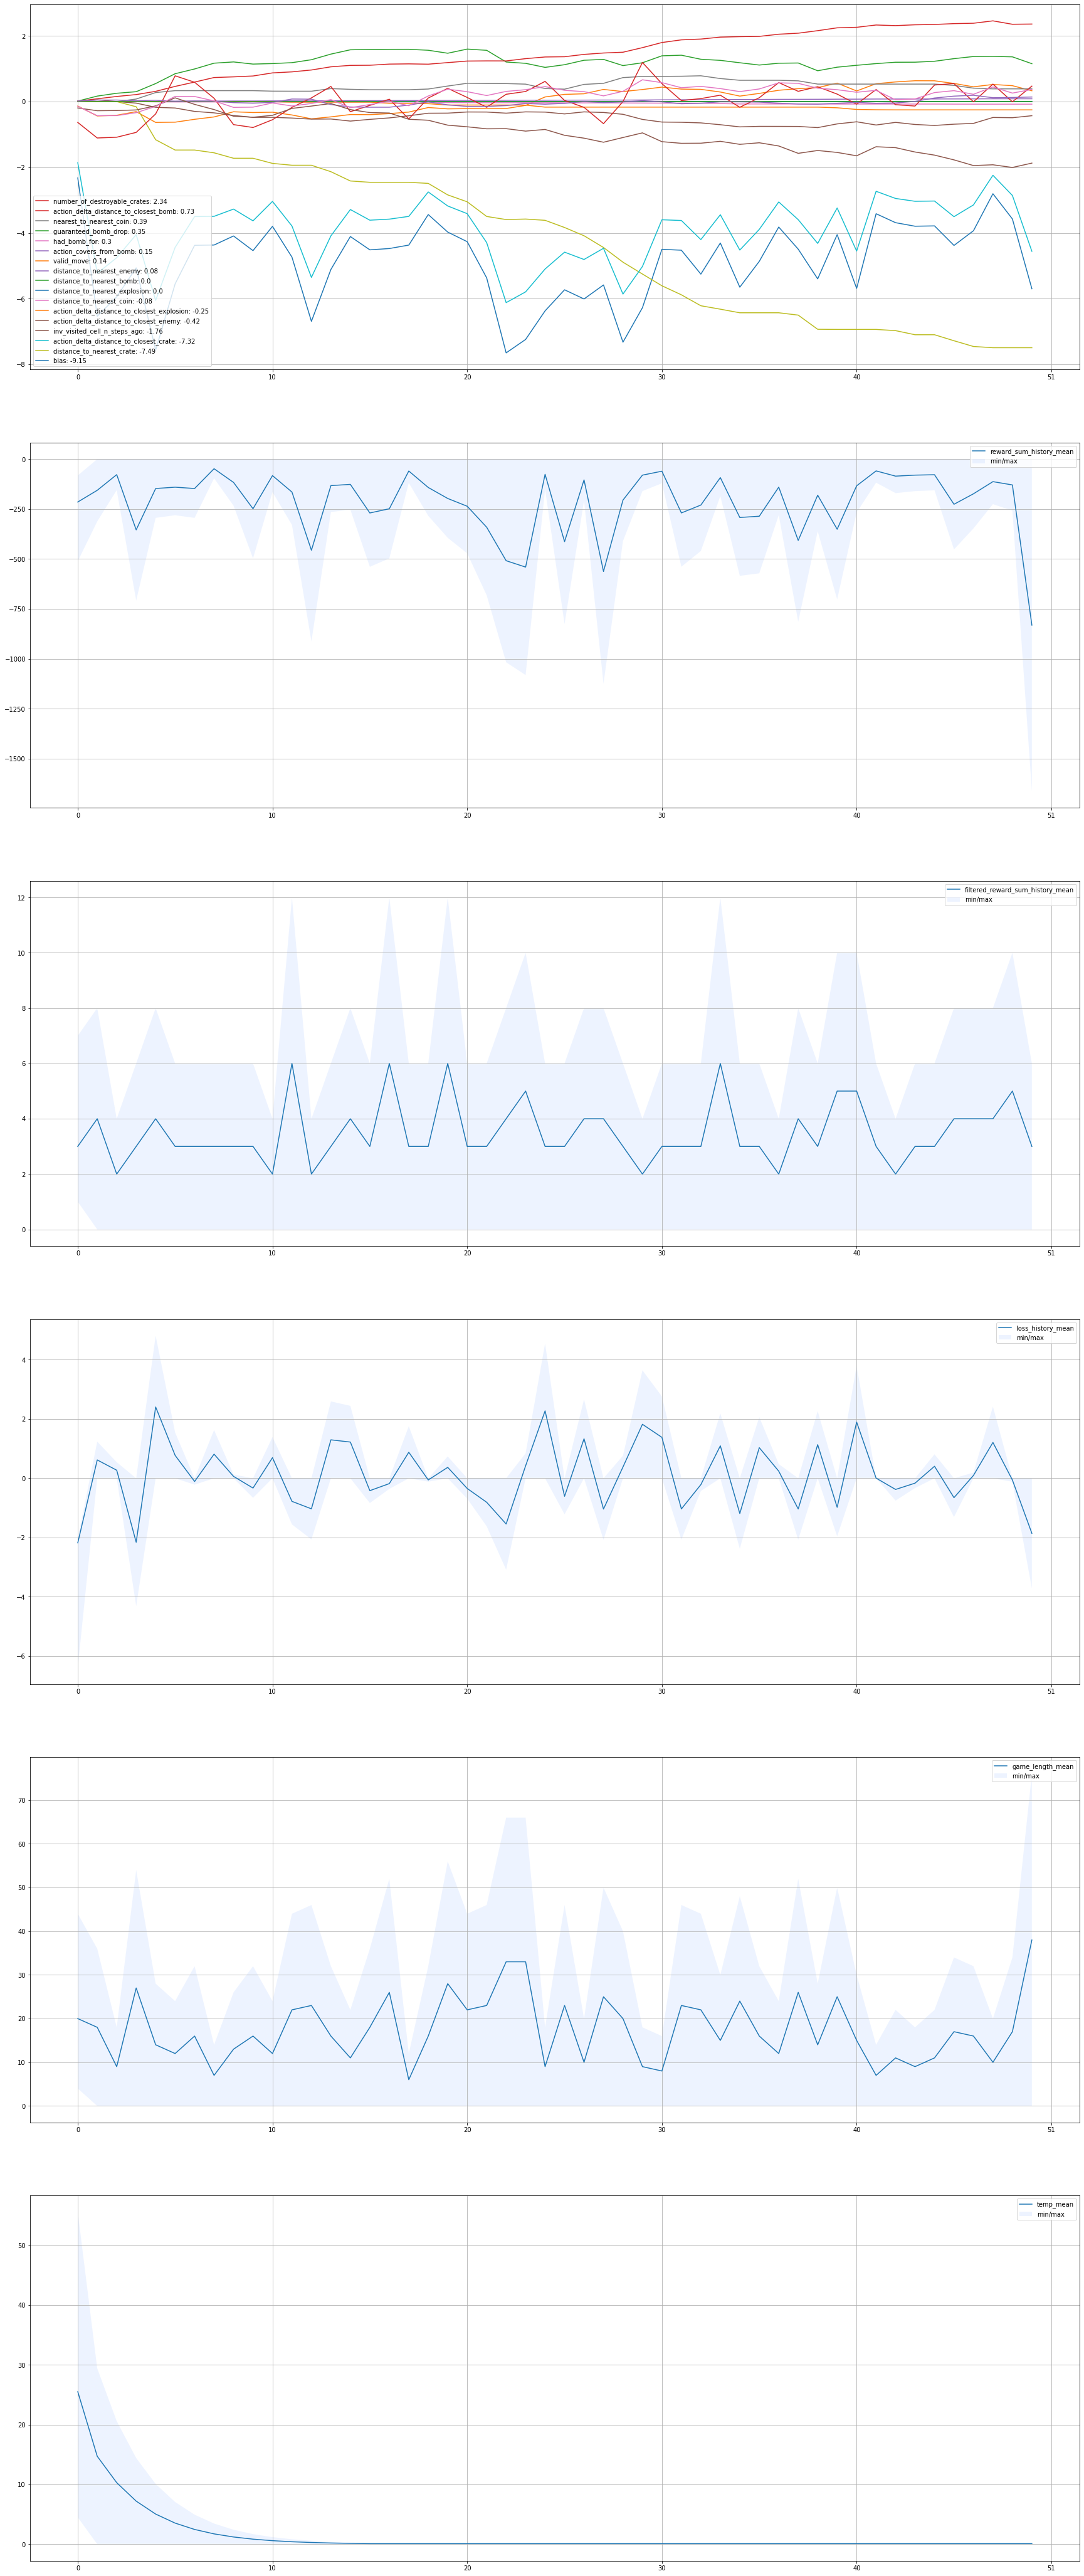

In [12]:
fig,ax = plt.subplots(6, 1, figsize=(30, 75))

for i, (name, this_weights_history) in enumerate(zip(weight_names, each_weights_history_mean)):
    ax[0].plot(np.arange(len(this_weights_history)), this_weights_history, label=f"{weight_names[i]}: {np.round(analysis['weight_history'][-1][i], 2)}")

ax[1].plot(np.arange(len(reward_sum_history_mean)), reward_sum_history_mean, label="reward_sum_history_mean")
ax[2].plot(np.arange(len(filtered_reward_sum_history_mean)), filtered_reward_sum_history_mean, label="filtered_reward_sum_history_mean")
ax[3].plot(np.arange(len(loss_history_mean)), loss_history_mean, label="loss_history_mean")
ax[4].plot(np.arange(len(game_length_mean)), game_length_mean, label="game_length_mean")
ax[5].plot(np.arange(len(temp_mean)), temp_mean, label="temp_mean")

ax[1].fill_between(np.arange(len(reward_sum_history_mean)), reward_sum_history_mean - np.abs(reward_sum_history_min), reward_sum_history_mean + np.abs(reward_sum_history_max), facecolor="#bbd2ff", alpha=0.25, edgecolor='none', label="min/max")
ax[2].fill_between(np.arange(len(filtered_reward_sum_history_mean)), filtered_reward_sum_history_mean - filtered_reward_sum_history_min, filtered_reward_sum_history_mean + filtered_reward_sum_history_max, facecolor="#bbd2ff", alpha=0.25, edgecolor='none', label="min/max")
ax[3].fill_between(np.arange(len(loss_history_mean)), loss_history_mean - np.abs(loss_history_min), loss_history_mean + np.abs(loss_history_max), facecolor="#bbd2ff", alpha=0.25, edgecolor='none', label="min/max")
ax[4].fill_between(np.arange(len(game_length_mean)), game_length_mean - game_length_min, game_length_mean + game_length_max, facecolor="#bbd2ff", alpha=0.25, edgecolor='none', label="min/max")
ax[5].fill_between(np.arange(len(temp_mean)), temp_mean - temp_min, temp_mean + temp_max, facecolor="#bbd2ff", alpha=0.25, edgecolor='none', label="min/max")

for i, axis in enumerate(ax):
    axis.grid("all")
    axis.set_xticks(np.linspace(0, 50, 6))
    axis.set_xticklabels(np.linspace(0, len(reward_sum_history), 6).astype(int))
    axis.legend()

handles, labels = ax[0].get_legend_handles_labels()
labels, handles, end_value = zip(*sorted([[labels[i], handles[i], analysis["weight_history"][-1][i]] for i in range(len(labels))], key=lambda a: -a[2]))
ax[0].legend(handles, labels, loc="lower left");